## **Problem Statement : Analysis of Different Classification Models for Lung Cancer Prediction and Finding the Best Model**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
df=pd.read_csv('drive/MyDrive/survey_lung_cancer.csv')

In [34]:
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [35]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [52]:
a=df.drop(["PEER_PRESSURE","GENDER"],axis=1)

In [53]:
a.head(10)

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,69,1,2,2,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,2,1,1,2,2,0
4,63,1,2,1,1,1,1,2,1,2,2,1,1,0
5,75,1,2,1,2,2,2,2,1,2,2,1,1,1
6,52,2,1,1,1,2,1,2,2,2,2,1,2,1
7,51,2,2,2,1,2,2,1,1,1,2,2,1,1
8,68,2,1,2,1,2,1,1,1,1,1,1,1,0
9,53,2,2,2,2,1,2,1,2,1,1,2,2,1


# **Correlation Matrix**

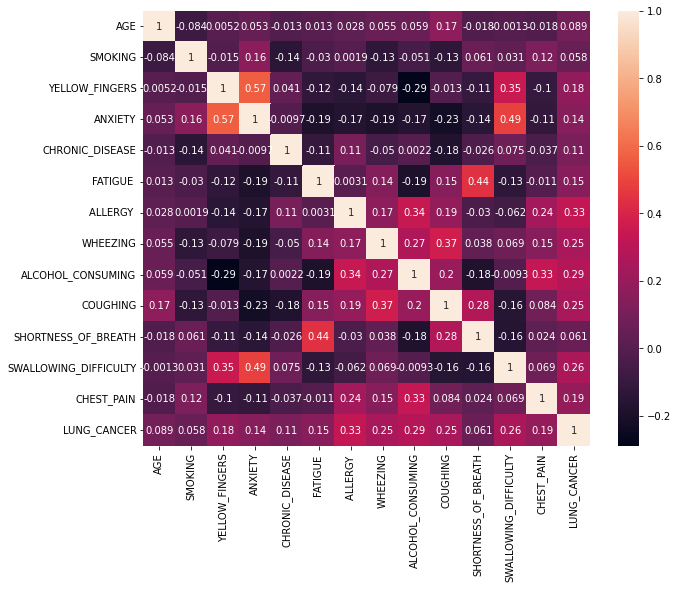

In [54]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(a.corr(), annot=True, ax=ax)

# **Getting 60% Data as Training Data and 40% Data as Testing Data**

In [55]:
X=a.drop("LUNG_CANCER",axis=1)

In [56]:
Y=a[["LUNG_CANCER"]]

In [57]:
from sklearn.model_selection import train_test_split

In [171]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

# **Logistic Regression**

In [172]:
from sklearn.linear_model import LogisticRegression

In [173]:
l=LogisticRegression()

In [174]:
l.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [175]:
b=l.predict(X_test)

In [176]:
from sklearn.metrics import accuracy_score

In [177]:
accuracy_score(b,Y_test)

0.9139784946236559

# **Gaussian Naive Bayes**

In [178]:
from sklearn.naive_bayes import GaussianNB

In [179]:
g=GaussianNB()
g.fit(X_train,Y_train)
c=g.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [180]:
accuracy_score(c,Y_test)

0.9139784946236559

# **Decision Tree Classifier**

In [181]:
from sklearn.tree import DecisionTreeClassifier

In [182]:
d=DecisionTreeClassifier()
d.fit(X_train,Y_train)
e=d.predict(X_test)

In [183]:
accuracy_score(e,Y_test)

0.8817204301075269

# **Random Forest Classifier**

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
r=RandomForestClassifier()
r.fit(X_train,Y_train)
f=r.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [186]:
accuracy_score(f,Y_test)

0.946236559139785

# **KNN Classifier**

In [187]:
from sklearn.neighbors import KNeighborsClassifier

In [188]:
k=KNeighborsClassifier()
k.fit(X_train,Y_train)
h=k.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [189]:
accuracy_score(h,Y_test)


0.9247311827956989

# **SVC Classifier**

In [190]:
from sklearn.svm import SVC

In [191]:
s=SVC()
s.fit(X_train,Y_train)
i=s.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [192]:
accuracy_score(i,Y_test)

0.8709677419354839